In [2]:
from numpy import c_

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

#membaca data masukan
dataspsf = pd.read_csv("spsf_data.txt", sep = "    ", engine = 'python')

print(dataspsf)

      i   j    x    y     z
0     1   1 -7.0 -7.0 -0.11
1     1   2 -7.0 -6.0 -0.77
2     1   3 -7.0 -5.0  0.11
3     1   4 -7.0 -4.0  1.36
4     1   5 -7.0 -3.0  0.65
..   ..  ..  ...  ...   ...
220  15  11  7.0  3.0 -1.63
221  15  12  7.0  4.0  0.20
222  15  13  7.0  5.0  1.39
223  15  14  7.0  6.0 -0.26
224  15  15  7.0  7.0 -1.75

[225 rows x 5 columns]


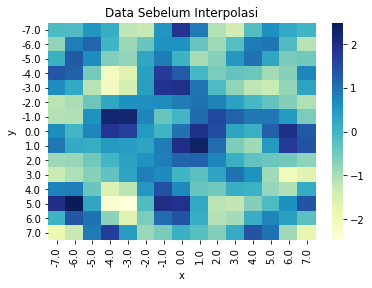

In [10]:
#mencoba keluaran dari data masukan

inputin = dataspsf.iloc[:,2:5]
inputin = inputin.pivot("y","x","z")
ax = sns.heatmap(inputin, cmap = "YlGnBu")
ax.set_title('Data Sebelum Interpolasi')
ax.get_figure().savefig('DataSebelumInterpolasi.png', dpi = 500)

In [4]:
#menyusun array 2d yang berisi data awal
zin1d = np.array(dataspsf['z'])
zin2d = np.reshape(zin1d,(15,15))
zpol = []

for i in range(29):
    for j in range(29):
        if i%2 == 0 and j%2 == 0:
            zpol.append(zin2d[i//2][j//2])
        else:
            zpol.append(0)
#array 2d berisi data awal
zpol2d = np.reshape(zpol,(29,29))

#menghitung nilai interpolasi kotak merah
for i in range(29):
    for j in range (28):
        if i%2 == 0 and j%2 == 1:
            zpol2d[i][j] = 0.5*(zpol2d[i][j-1] + zpol2d[i][j+1])
#menghitung nilai interpolasi kotak hijau dan x
for j in range(29):
    for i in range(28):
        if i%2 == 1:
            zpol2d[i][j] = 0.5*(zpol2d[i-1][j]+zpol2d[i+1][j])
            
#mengembalikan array hasil interpolasi menjadi data keluaran yang diinginkan
zhasil = np.reshape(zpol2d,(1,841))
xpol = np.linspace(-7,7,29)
ypol = np.linspace(-7,7,29)

#menyusun array keluaran akhir
#menyusun kolom indeks i dan j
x = np.linspace(1,29,29)
kolom_i = np.repeat(x,29)
kolom_j = np.tile(x,29)
#kolom x
kolom_x = np.repeat(xpol,29)
#kolom y
kolom_y = np.tile(ypol,29)

#Array hasil akhir
HasilAkhir = np.vstack((kolom_i,kolom_j,kolom_x,kolom_y,zhasil)).T

In [5]:
#Menuliskan keluaran dalam bentuk tabel dengan format .txt
HasilAkhirBanget = pd.DataFrame({'i':HasilAkhir[:,0],'j':HasilAkhir[:,1],'xpol':HasilAkhir[:,2],'ypol':HasilAkhir[:,3],'zpol':HasilAkhir[:,4]})
np.savetxt('spsf_hasil_interpolasi.txt', HasilAkhirBanget.values, fmt='%1.2f', delimiter="\t", header="i\tj\tx\ty\tz")

print(HasilAkhirBanget)

        i     j  xpol  ypol   zpol
0     1.0   1.0  -7.0  -7.0 -0.110
1     1.0   2.0  -7.0  -6.5 -0.440
2     1.0   3.0  -7.0  -6.0 -0.770
3     1.0   4.0  -7.0  -5.5 -0.330
4     1.0   5.0  -7.0  -5.0  0.110
..    ...   ...   ...   ...    ...
836  29.0  25.0   7.0   5.0  1.390
837  29.0  26.0   7.0   5.5  0.565
838  29.0  27.0   7.0   6.0 -0.260
839  29.0  28.0   7.0   6.5 -1.005
840  29.0  29.0   7.0   7.0 -1.750

[841 rows x 5 columns]


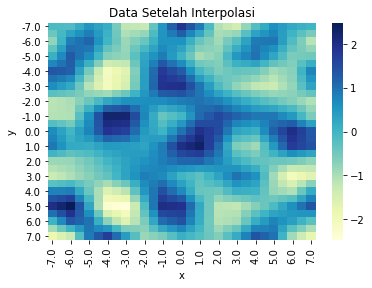

In [9]:
#memplot data hasil interpolasi

dataipol = pd.read_csv("spsf_hasil_interpolasi.txt", sep = "\t")
inputpol = dataipol.iloc[:,2:5]
inputpol = inputpol.pivot("y","x","z")
bx = sns.heatmap(inputpol, cmap = 'YlGnBu')
bx.set_title('Data Setelah Interpolasi')
bx.get_figure().savefig('DataSetelahterpolasi.png', dpi = 500)